<a href="https://colab.research.google.com/github/AsiaZendarska/data-science-bootcamp/blob/main/KursUdemyDataScience_UczenieG%C5%82%C4%99bokie_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TENSOFLOW

Strona biblioteki: https://www.tensorflow.org/

Dokumentacja: https://www.tensorflow.org/api_docs

Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.

Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:

pip install tensorflow


## Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.

Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).

## Import bibliotek

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.15.0


## Załadowanie i przygotowanie danych

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
print(f'X_train[0]: {X_train[0].shape}')

X_train[0]: (28, 28)


In [6]:
X_train = X_train / 255.
X_test = X_test / 255

## Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

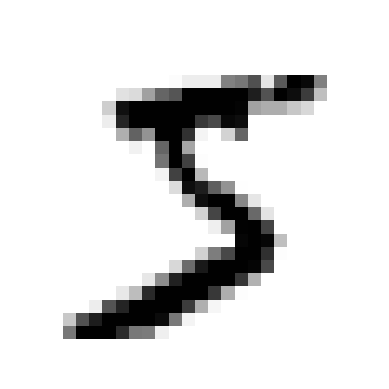

In [8]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

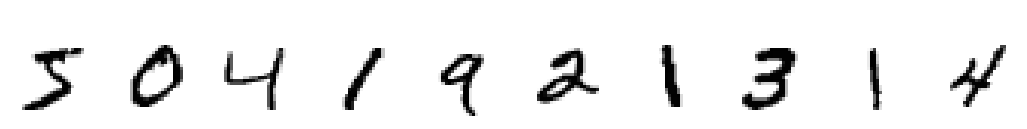

In [13]:
# Wyświetlamy kilka różnych obrazów
plt.figure(figsize=(13,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

## Budowa sieci neuronowej

In [17]:
# Budujemy model  który na podstawie danych wejsciowych przewiduje klasy
model = Sequential() # instancja modelu
model.add(Flatten(input_shape=(28,28))) # warstwa wypłaszcza dane
model.add(Dense(units=128, activation='relu')) # warstwa gęsto położona
model.add(Dropout(0.2)) # porzuca 20% neuronów
model.add(Dense(units=10, activation='softmax')) # warstwa wynikowa z 10 klasami

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Trenowanie modelu

In [23]:
history = model.fit(X_train, y_train, epochs=10) # ile razy cały zbiór przejdzie przez naszą sieć

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0651 - accuracy: 0.9792
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0591 - accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0516 - accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0473 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0434 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0426 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0379 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9877
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.032

## Ocena modelu

In [24]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0788 - accuracy: 0.9813 - 444ms/epoch - 1ms/step


[0.07883436977863312, 0.9812999963760376]

In [25]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.065060,0.979217
1,0.059107,0.980950
2,0.051599,0.983000
3,0.047340,0.984117
4,0.043363,0.985633
5,0.042628,0.986250
6,0.037922,0.986933
7,0.035467,0.987750
8,0.034322,0.988050
9,0.032258,0.988717


In [26]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

## Predykcja na podstawie modelu

In [27]:
model.predict(X_test) # zwraca nam wartość prawdopodobieństwa dla każdej klasy

313/313 [==============================] - 1s 2ms/step


array([[0.            , 0.000000000001, 0.000000025304, ..., 0.9999785     , 0.000000000468, 0.000000000581],
       [0.            , 0.000000210095, 0.9999997     , ..., 0.            , 0.            , 0.            ],
       [0.000000000002, 0.99998397    , 0.000000139045, ..., 0.000014605671, 0.000001079011, 0.000000000067],
       ...,
       [0.            , 0.            , 0.            , ..., 0.000000021131, 0.000000000559, 0.000000563845],
       [0.            , 0.000000000074, 0.            , ..., 0.            , 0.000001138931, 0.            ],
       [0.000000000002, 0.            , 0.000000000009, ..., 0.            , 0.            , 0.            ]],
      dtype=float32)

In [31]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [33]:
# Łączymy dane które nasz model żle sklasyfikował
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [35]:
# porównujemy gdzie te elementy się nie zgadzają
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([151, 247, 274, 321, 445, 495, 582, 591, 610, 619], dtype='int64')

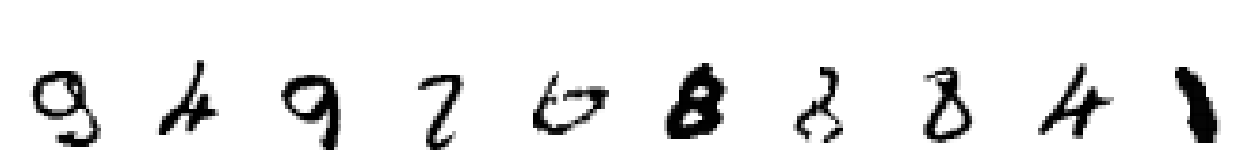

In [37]:
# Wyświetlamy jak nasz model sobie radzi
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()

# KERAS

Strona biblioteki: https://keras.io/

Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.

Aby zainstalować bibliotekę keras, użyj polecenia poniżej:

pip install keras

Załadowanie bibliotek

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.express as px
tf.__version__

## Model sekwencjny (Sequential Model) Wprowadzenie - pierwszy model



Model sekwencyjny to nic innego jak liniowy stos warstw

In [38]:
# utworzenie instancji klasy Sequential
from tensorflow.keras.models import Sequential

model = Sequential()
print(model)

Podstawowym elementem składowym modelu są warstwy. Aby dodać najbardziej standardową warstwę - warstwę gęsto połączoną należy użyć warstwy Dense. Aby dodać warstwę do modelu należy użyć metody .add()

In [41]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=4, input_shape=(10,))) # units licza neuronów

Wyświetlenie podsumowania modelu: metoda .summary()

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 44        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Dodanie kolejnej warstwy

In [44]:
model.add(Dense(units=2))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 44        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
Total params: 74 (296.00 Byte)
Trainable params: 74 (296.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Funkcje aktywacji

Istotnym elemenem sieci neuronowych jest dobór odpowiednich funkcji aktywacji. Funkcje aktywacji jak sama nazwa wskazuje są odpowiedzialne za aktywowanie odpowiednich neuronów podczas procesu uczenia.

Jeżeli nie określimy podczas dodawania warstwy funkcji aktywacji, domyślnie stosowana jest liniowa funkcja aktywacji, tzn.

Warstwa z liniową funkcją aktywacji może uczyć się tylko liniowych przekształceń danych wejściowych. Dlatego stosuje się różne funkcje aktywacji aby rozwiazywać problemy nieliniowe.

Keras: Funkcje aktywacji

In [48]:
from tensorflow.keras.activations import linear

random_data = np.linspace(start=-3, stop=3, num=300)
data = pd.DataFrame({'data': random_data, 'linear': linear(random_data)})
data.head()

,data,linear
0,-3.000000,-3.000000
1,-2.979933,-2.979933
2,-2.959866,-2.959866
3,-2.939799,-2.939799
4,-2.919732,-2.919732


In [47]:
px.line(data, x='data', y='linear', width=500, height=400, range_y=[-3, 3])

In [49]:
from tensorflow.keras.activations import sigmoid

data = pd.DataFrame({'data': random_data, 'sigmoid': sigmoid(random_data)})
data.head()

,data,sigmoid
0,-3.000000,0.047426
1,-2.979933,0.048341
2,-2.959866,0.049272
3,-2.939799,0.050221
4,-2.919732,0.051187


In [50]:
px.line(data, x='data', y='sigmoid', width=500, height=400, range_y=[-0.5, 1.5])

In [51]:
from tensorflow.keras.activations import relu

data = pd.DataFrame({'data': random_data, 'relu': relu(random_data)})
data.head()

,data,relu
0,-3.000000,0.0
1,-2.979933,0.0
2,-2.959866,0.0
3,-2.939799,0.0
4,-2.919732,0.0


In [52]:
px.line(data, x='data', y='relu', width=500, height=400, range_y=[-0.5, 1.5])

In [53]:
from tensorflow.keras.activations import tanh

data = pd.DataFrame({'data': random_data, 'tanh': tanh(random_data)})
data.head()

,data,tanh
0,-3.000000,-0.995055
1,-2.979933,-0.994853
2,-2.959866,-0.994643
3,-2.939799,-0.994424
4,-2.919732,-0.994196


In [54]:
px.line(data, x='data', y='tanh', width=500, height=400, range_y=[-1.5, 1.5])

In [55]:
model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=(10,)))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 88        
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Kompilacja modelu

Przed rozpoczęciem trenowania sieci należy odpowiednio skonfigurować proces uczenia. W tym kroku określamy:

rodzaj optymalizatora (Keras - Optymalizatory)

funkcję straty (Keras - Funkcje Straty)

metryki, które będziemy obserwować podczas trenowania
sieci (Keras - Metryki)

In [56]:
# klasyfikacja binarna
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# klasyfikacja wieloklasowa
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# regresja
model.compile(optimizer='rmsprop',
              loss='mse')

## Trenowanie modelu

Za dane wejściowe do modelu należy przekazać Numpy arrays:

epochs - krotność przejścia danych przez sieć w procesie uczenia
batch_size - rozmiar wsadu po którym następuje aktualizacja wag
validation_split - część danych treningowych, które zostaną wykorzystane jako zbiór walidacyjny
validation_data - (x_val, y_val) - dane wykorzystane do walidacji modelu

In [ ]:
# model.fit(data, labels, epochs=10, batch_size=32)
# model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2)
# model.fit(data, labels, epochs=10, batch_size=32, validation_data=(x_val, y_val))

## Przykład - klasyfikacja binarna

In [58]:
data = np.random.randn(10000, 150)
labels = np.random.randint(2, size=(10000, 1))

print(data.shape)
print(labels.shape)

(10000, 150)
(10000, 1)


In [59]:
data[:3]

array([[ 0.74327522967 ,  0.507895704223,  0.336877698012, -0.010478200864, -0.043263308744, -0.776214196744,
         0.133386973514,  1.141885933054, -1.032447726439,  2.225108683901,  0.034756284473,  0.380075845413,
         0.31213877106 ,  0.432877734128, -1.49959852256 ,  1.387720721161, -0.153816972726, -1.398781784688,
        -1.497563236685,  1.055253783798, -0.452120219213, -1.001266458953, -1.122832831288,  0.420163834622,
        -0.816663652704, -1.837512114389,  1.071131886516, -1.501786734333,  1.141934936375,  1.648097035043,
         0.273833154665,  0.955427288992,  1.504006974882, -0.371972520467, -0.151436596382,  2.018001552888,
        -0.51799190045 , -1.73966313655 ,  1.319282413409,  0.759539152163, -1.202273056678, -0.801409293217,
        -0.399502604708,  0.599508727934,  1.494895826271,  0.042738211134,  0.107329683911, -0.14186360694 ,
         0.344823269587, -1.329368586375,  0.377465035785, -1.011338356413,  1.665270519558, -1.487861845232,
         1

In [60]:
labels[:10]

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [65]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=20)

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 0.7545 - accuracy: 0.4934
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.5434
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6776 - accuracy: 0.5719
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6618 - accuracy: 0.5991
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6479 - accuracy: 0.6187
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6332 - accuracy: 0.6445
Epoch 7/20
313/313 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.6661
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.6039 - accuracy: 0.6835
Epoch 9/20
313/313 [==============================] - 1s 3ms/step - loss: 0.5895 - accuracy: 0.6936
Epoch 10/20
313/313 [==============================] - 1s 3ms/step - loss: 0.5759 - accuracy: 0.7062

In [66]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=20, batch_size=64)

Epoch 1/20
157/157 [==============================] - 1s 2ms/step - loss: 0.7621 - accuracy: 0.5053
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.5327
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5646
Epoch 4/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.5834
Epoch 5/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.6078
Epoch 6/20
157/157 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.6229
Epoch 7/20
157/157 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.6409
Epoch 8/20
157/157 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.6554
Epoch 9/20
157/157 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.6702
Epoch 10/20
157/157 [==============================] - 0s 3ms/step - loss: 0.6061 - accuracy: 0.6827

In [69]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
250/250 [==============================] - 3s 6ms/step - loss: 0.7452 - accuracy: 0.5029 - val_loss: 0.7129 - val_accuracy: 0.5240
Epoch 2/20
250/250 [==============================] - 2s 8ms/step - loss: 0.6924 - accuracy: 0.5429 - val_loss: 0.7109 - val_accuracy: 0.5105
Epoch 3/20
250/250 [==============================] - 1s 5ms/step - loss: 0.6750 - accuracy: 0.5736 - val_loss: 0.7126 - val_accuracy: 0.5125
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6610 - accuracy: 0.6025 - val_loss: 0.7148 - val_accuracy: 0.5155
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6482 - accuracy: 0.6231 - val_loss: 0.7192 - val_accuracy: 0.5205
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6340 - accuracy: 0.6442 - val_loss: 0.7249 - val_accuracy: 0.5115
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6196 - accuracy: 0.6650 - val_loss: 0.7297 - val_accuracy: 0.5165
Epoch 

In [70]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

In [71]:
history

In [72]:
metrics = history.history
metrics.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [73]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(data, labels, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
250/250 [==============================] - 1s 3ms/step - loss: 0.7648 - accuracy: 0.4980 - val_loss: 0.7169 - val_accuracy: 0.5190
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.5350 - val_loss: 0.7137 - val_accuracy: 0.5160
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6792 - accuracy: 0.5732 - val_loss: 0.7133 - val_accuracy: 0.5200
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6625 - accuracy: 0.6016 - val_loss: 0.7152 - val_accuracy: 0.5180
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6478 - accuracy: 0.6246 - val_loss: 0.7186 - val_accuracy: 0.5080
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6327 - accuracy: 0.6489 - val_loss: 0.7244 - val_accuracy: 0.5140
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.6178 - accuracy: 0.6658 - val_loss: 0.7290 - val_accuracy: 0.5130
Epoch 

In [74]:
test_data = np.random.randn(5, 150)
test_labels = np.random.randint(2, size=(5, 1))

In [75]:
model.predict(test_data)

1/1 [==============================] - 0s 51ms/step


array([[0.6305236 ],
       [0.9191357 ],
       [0.49141756],
       [0.29480052],
       [0.7885689 ]], dtype=float32)

## Przykład - klasyfikacja wieloklasowa

In [78]:
data = np.random.random((10000, 150))
labels = np.random.randint(10, size=(10000, 1))

In [79]:
print(data.shape)
print(labels.shape)

(10000, 150)
(10000, 1)


In [80]:
labels[:10]

array([[7],
       [3],
       [8],
       [3],
       [8],
       [9],
       [0],
       [2],
       [5],
       [9]])

In [81]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels, num_classes=10)
labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [82]:
labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [83]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
250/250 [==============================] - 1s 3ms/step - loss: 2.3205 - accuracy: 0.0996 - val_loss: 2.3134 - val_accuracy: 0.0935
Epoch 2/30
250/250 [==============================] - 0s 2ms/step - loss: 2.3035 - accuracy: 0.1076 - val_loss: 2.3099 - val_accuracy: 0.0895
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 2.3002 - accuracy: 0.1075 - val_loss: 2.3108 - val_accuracy: 0.1015
Epoch 4/30
250/250 [==============================] - 1s 3ms/step - loss: 2.2975 - accuracy: 0.1131 - val_loss: 2.3146 - val_accuracy: 0.0940
Epoch 5/30
250/250 [==============================] - 1s 3ms/step - loss: 2.2934 - accuracy: 0.1165 - val_loss: 2.3149 - val_accuracy: 0.0990
Epoch 6/30
250/250 [==============================] - 1s 3ms/step - loss: 2.2910 - accuracy: 0.1235 - val_loss: 2.3178 - val_accuracy: 0.0985
Epoch 7/30
250/250 [==============================] - 1s 3ms/step - loss: 2.2875 - accuracy: 0.1244 - val_loss: 2.3175 - val_accuracy: 0.0920
Epoch 

In [84]:
test_data = np.random.random((10, 150))

model.predict(test_data)

1/1 [==============================] - 0s 50ms/step


array([[0.14406238 , 0.033966646, 0.0748192  , 0.082791805, 0.07989639 , 0.26314786 , 0.03578688 , 0.08086612 ,
        0.07378281 , 0.13087983 ],
       [0.106769174, 0.08251299 , 0.100524634, 0.07570478 , 0.0922727  , 0.12882581 , 0.11163428 , 0.08972186 ,
        0.11578792 , 0.09624586 ],
       [0.05958401 , 0.121220574, 0.11150025 , 0.0787936  , 0.092133634, 0.14551032 , 0.0761678  , 0.080224864,
        0.13125531 , 0.10360958 ],
       [0.09012591 , 0.06643898 , 0.10678695 , 0.13392614 , 0.12711403 , 0.0577141  , 0.10415004 , 0.09464135 ,
        0.12790415 , 0.09119839 ],
       [0.1442473  , 0.045195103, 0.03608196 , 0.14029838 , 0.08551998 , 0.06560612 , 0.101107016, 0.081142135,
        0.18255404 , 0.11824798 ],
       [0.10984167 , 0.0670458  , 0.10489933 , 0.09463482 , 0.11946021 , 0.08622531 , 0.18021563 , 0.09255247 ,
        0.051720865, 0.09340387 ],
       [0.08979748 , 0.10513485 , 0.073215775, 0.09449846 , 0.06162964 , 0.116710976, 0.09501834 , 0.09312237 ,
      

## Przykład - regresja

In [86]:
data = np.random.random((10000,150))
labels = 50 * np.random.random(10000)

In [87]:
labels[:10]

array([ 3.293450038982, 31.962328170618, 40.321363934212, 21.917431939489, 34.666540648505,  7.573653765475,
       27.604370411282, 18.692235342915, 35.920363686646, 42.764935231325])

In [88]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop',
              loss='mse')

model.fit(data, labels, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
250/250 [==============================] - 1s 3ms/step - loss: 246.4545 - val_loss: 206.9087
Epoch 2/30
250/250 [==============================] - 1s 2ms/step - loss: 208.2924 - val_loss: 208.3463
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 207.6752 - val_loss: 208.5007
Epoch 4/30
250/250 [==============================] - 0s 2ms/step - loss: 207.4523 - val_loss: 207.9809
Epoch 5/30
250/250 [==============================] - 1s 2ms/step - loss: 207.2242 - val_loss: 209.3067
Epoch 6/30
250/250 [==============================] - 0s 2ms/step - loss: 206.6475 - val_loss: 208.7635
Epoch 7/30
250/250 [==============================] - 1s 2ms/step - loss: 206.6453 - val_loss: 208.2709
Epoch 8/30
250/250 [==============================] - 1s 2ms/step - loss: 206.4060 - val_loss: 208.9322
Epoch 9/30
250/250 [==============================] - 1s 2ms/step - loss: 205.8854 - val_loss: 208.9013
Epoch 10/30
250/250 [==============================] - 1s 2ms/st

In [89]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop',
              loss='mae',
              metrics=['mse'])

model.fit(data, labels, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
250/250 [==============================] - 1s 4ms/step - loss: 13.7714 - mse: 270.9175 - val_loss: 12.4533 - val_mse: 207.8916
Epoch 2/30
250/250 [==============================] - 1s 3ms/step - loss: 12.4270 - mse: 208.5703 - val_loss: 12.4370 - val_mse: 207.1414
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 12.4132 - mse: 208.3642 - val_loss: 12.4500 - val_mse: 207.6060
Epoch 4/30
250/250 [==============================] - 1s 2ms/step - loss: 12.3946 - mse: 207.8187 - val_loss: 12.4700 - val_mse: 208.4033
Epoch 5/30
250/250 [==============================] - 1s 2ms/step - loss: 12.3809 - mse: 207.5179 - val_loss: 12.4509 - val_mse: 207.6613
Epoch 6/30
250/250 [==============================] - 1s 2ms/step - loss: 12.3767 - mse: 207.4164 - val_loss: 12.4502 - val_mse: 207.6207
Epoch 7/30
250/250 [==============================] - 1s 2ms/step - loss: 12.3652 - mse: 207.2927 - val_loss: 12.4563 - val_mse: 208.0586
Epoch 8/30
250/250 [==============

In [91]:
test_data = np.random.random((10,150))

model.predict(test_data)

1/1 [==============================] - 0s 54ms/step


array([[22.573164],
       [24.74954 ],
       [21.196669],
       [22.379623],
       [26.707495],
       [24.055162],
       [24.199347],
       [21.505167],
       [19.321611],
       [27.420156]], dtype=float32)

# KLASYFIKATOR WIELOKLASOWY - IMAGE RECOGNITION

Celem tego notebook'a jest budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru. W tym celu wykorzystamy kolejny popularny zbiór danych w dziedzinie sieci neuronowych: Fashion MNIST

Fashion-MNIST to zestaw danych z obrazkami artykułów Zalando - składający się z zestawu treningowego 60 000 przykładów i zestawu testowego 10 000 przykładów. Każdy przykład to obraz w skali szarości 28 x 28, powiązany z jedną etykietą z 10 klas.

## Import bibliotek

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

'2.15.0'

## Załadowanie danych i wstępna eksploracja

In [93]:
(X_train, y_train), (X_test, y_test) = load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [94]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [95]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,  72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88, 172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243, 202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12, 219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197, 209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99, 244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119, 167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55, 236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,  92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237, 226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,  77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228, 207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244, 159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217, 226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238, 215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200, 159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232, 246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,  80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228, 225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217, 241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224, 229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198, 213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221, 230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219, 221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205, 206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211, 210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177, 210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189, 188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216, 170,   0],
       [  2,   0,   0,   0,  66, 200, 222, 237, 239, 242, 246, 243, 244, 221, 220, 193, 191, 179, 182, 182, 181, 176, 166, 168,  99,  58,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  40,  61,  44,  72,  41,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [96]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

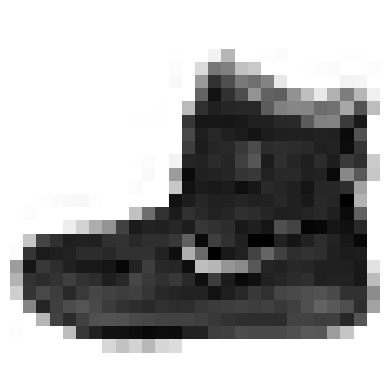

In [97]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

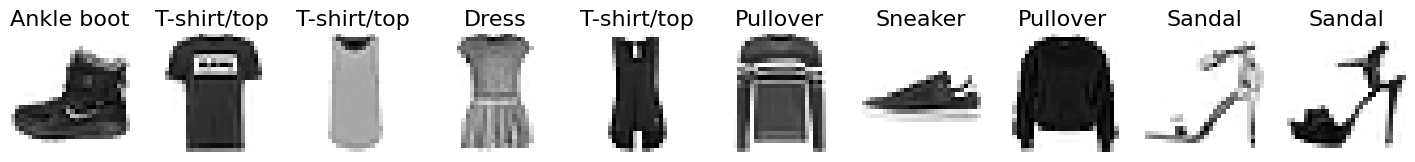

In [98]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()


In [99]:
X_train = X_train / 255.
X_test = X_test / 255.

In [100]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

## Budowa modelu

In [101]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               100480    
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


epochs - ile razy zestaw treningowy zostanie przetworzony przez model. Przy każdej iteracji optymalizator próbuje dopasować wagi, aby funkcja celu została zminimalizowana.

batch_size - liczba przykładów treningowych po której następuje aktualizacji wag

validation_split - procent danych użytych do walidacji

In [105]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2622 - accuracy: 0.9076 - val_loss: 0.3771 - val_accuracy: 0.8848
Epoch 2/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2590 - accuracy: 0.9085 - val_loss: 0.3900 - val_accuracy: 0.8814
Epoch 3/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2541 - accuracy: 0.9110 - val_loss: 0.3892 - val_accuracy: 0.8832
Epoch 4/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2476 - accuracy: 0.9140 - val_loss: 0.4005 - val_accuracy: 0.8845
Epoch 5/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2407 - accuracy: 0.9158 - val_loss: 0.3994 - val_accuracy: 0.8829
Epoch 6/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2368 - accuracy: 0.9179 - val_loss: 0.3961 - val_accuracy: 0.8877
Epoch 7/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2352 - accuracy: 0.9180 - val_loss: 0.3908 - val_accuracy:

In [103]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.524076,0.813812,0.400820,0.860333,0
1,0.387940,0.860563,0.408211,0.858083,1
2,0.352810,0.874604,0.351526,0.874500,2
3,0.331691,0.880250,0.351805,0.875083,3
4,0.315062,0.886958,0.353142,0.877417,4
5,0.303576,0.892958,0.366692,0.877667,5
6,0.293477,0.896104,0.360073,0.880000,6
7,0.283203,0.898458,0.354376,0.877917,7
8,0.277066,0.901271,0.375647,0.876750,8
9,0.269559,0.904063,0.356472,0.879833,9


## Ocena modelu

In [107]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [108]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8776999711990356


## Predykcja na podstawie modelu

Predykcja na podstawie modelu:

model.evaluate(y_true, y_pred) - pozwala obliczyć metryki modelu

model.predict_classes() - pozwala zwrócić odpowiednio przewidziane klasy

model.predict_proba(), model.predict() - pozwala zwrócić prawdopodobieństwo danej klasy

In [109]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[0.            , 0.            , 0.000000000001, ..., 0.000000006625, 0.            , 0.99999994    ],
       [0.000000157024, 0.            , 0.9999997     , ..., 0.            , 0.            , 0.            ],
       [0.            , 0.99999994    , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000000000006, 0.            , 0.            , ..., 0.            , 0.99999994    , 0.            ],
       [0.            , 0.99999994    , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.00000000385 , 0.000000000331, 0.000000002609, ..., 0.11191577    , 0.000007559366, 0.000003850481]], dtype=float32)

In [110]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.301683,0.000000,0.000001,0.000000,0.000000,0.000000,0.698316,0.000000,0.000000,0.000000


In [124]:
predictions_proba = model.predict(X_test)

# Przekształcenie prawdopodobieństw na etykiety klas
predictions_cls = np.argmax(predictions_proba, axis=1)
predictions_cls

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [120]:
y_test_class_index = np.argmax(y_test[idx])

## Eksploracja predykcji

In [125]:
#@title Wybierz indeks zdjęcia:
idx = 4970 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test_class_index:
  color = 'green'
else:
  color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v',
                     marker_color=color))
fig.update_layout(width=600, height=300,
                  title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

## Błędnie sklasyfikowane obrazy

In [126]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 121 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names,
                     y=predictions_df.iloc[index_mapper[idx]],
                     orientation='v',
                     marker_color='red'))

fig.update_layout(width=600, height=300,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

## Klika możliwości poprawy modeli

Klika możliwości poprawy modeli:

zwiększenie liczby epok

zwiększenie/zmniejszenie parametrów uczenia,
stronjenie hiperparametrów

zwiększenie/zmniejszenie liczby neuronów wewnątrz wartsw uktytych

zwiększenie/zmniejszenie parametru batch_size, czyli rozmiaru wsadu

zwiększenie/zmniejszenie liczby warstw ukrytych

zastosowanie regularyzacji (L1 - lasso, L2 - ridge), warstwy Dropout

# TRANSFER LEARNING - z użyciem Tensorflow Hub

Tensorflow Hub: tfhub.dev

Tensorflow Hub to biblioteka pozwalająca na wielokrotne i darmowe wykorzystywanie modułów modeli uczenia maszynowego. Tzw. transfer learning pozwala nam skorzystać z wcześniej wyuczonych modeli uczenia maszynowego na bardzo dużych zbiorach danych z zaawansowaną architekturą. Pozwala to zdecydowanie zaoszczędzic sporo czasu na dewelopowaniu własnych modeli, czy chociażby na mocy obliczeniowej wykorzystywaniej podczas trenowania.

Przykłady użycia transfer learningu:

trenowanie modelu z małym zbiorem danych
pozwala poprawić generalizację modeli
przyśpiesza proces trenowania modeli
niski próg wejścia dla osób chcących poznać zastosowania modeli

## Import bibliotek

In [127]:
import numpy as np
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt
print(f'Tensorflow version: {tf.__version__}')
print(f'Tensorflow Hub version: {hub.__version__}')

Tensorflow version: 2.15.0
Tensorflow Hub version: 0.16.1


## Załadowanie modelu

In [128]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

## Załadowanie etykiet

In [129]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

10484/10484 [==============================] - 0s 0us/step


array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear', 'toilet tissue'], dtype='<U30')

## Załadowanie obrazu

In [130]:
from google.colab import files
uploaded = files.upload()

Saving office.jpg to office.jpg


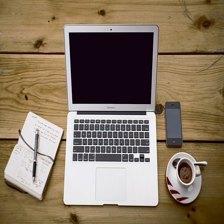

In [131]:
filename = list(uploaded.keys())[0]
img = Image.open(filename).resize(IMAGE_SHAPE)
img

## Predykcja na podstawie modelu

In [132]:
img_arr = np.array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)
result = classifier.predict(img_arr)
predicted_class = np.argmax(result[0], axis=-1)
predicted_class_name = imagenet_labels[predicted_class]
predicted_class_name

1/1 [==============================] - 1s 575ms/step


'notebook'

## Wyświetlenie predykcji

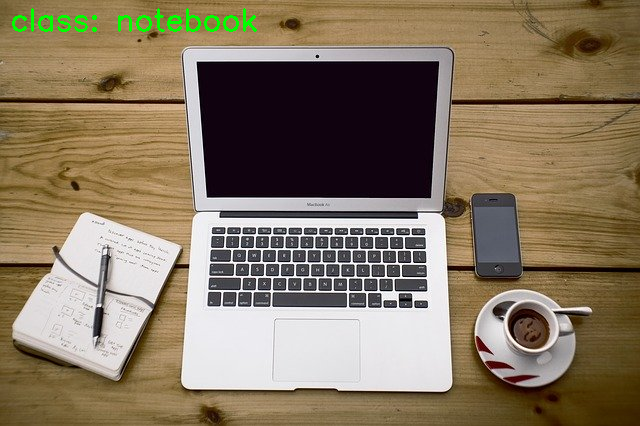

In [133]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(filename)
text = f'class: {predicted_class_name}'
img = cv2.putText(img=img, text=text, org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 255, 0), thickness=2)
cv2_imshow(img)